## Задача 1
df - данные о поездках на такси
Посмотреть зависимость расстояния поездки на получение чаевых.

In [1]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

import pymysql
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt


import seaborn as sns

'''
# Название таблицы
table_db = 'yellow_tripdata'

# Количество записей в результате
limit = 10000

# Подулючаемся в БД в MySQL
connection = pymysql.connect(
    host = '172.21.195.57',
    port = 3307,
    user = 'cryptoUser',
    password = '123456789',
    db = 'netology_data',
    cursorclass = pymysql.cursors.SSDictCursor
)

# Наш запрос
query = f'select * from {table_db} limit {limit}'

connection
'''

"\n# Название таблицы\ntable_db = 'yellow_tripdata'\n\n# Количество записей в результате\nlimit = 10000\n\n# Подулючаемся в БД в MySQL\nconnection = pymysql.connect(\n    host = '172.21.195.57',\n    port = 3307,\n    user = 'cryptoUser',\n    password = '123456789',\n    db = 'netology_data',\n    cursorclass = pymysql.cursors.SSDictCursor\n)\n\n# Наш запрос\nquery = f'select * from {table_db} limit {limit}'\n\nconnection\n"

In [2]:
%%time
# Получаем в df наши данные
'''
df = pd.read_sql(query, connection)
'''

df = pd.read_csv('netology_data.csv', sep=';')
df.head()

# Создаем дубликат df
df2 = df.copy(deep=True)
df.head()

Wall time: 1.01 s


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,2,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,3,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


In [3]:
# Оставляем только нужные столбцы
df = df[['trip_distance', 'tip_amount', 'passenger_count']]
df.head()

,trip_distance,tip_amount,passenger_count
0,2,1.65,1
1,3,1.00,1
2,0,0.00,3
3,0,0.00,5
4,0,0.00,5


In [4]:
"""
Я хотел бы узнать есть ли зависимость получения чаевых (получил или нет) от Расстояния поездки (или можно от Количества пассажиров)
    
    
Т.е. мы хотим узнать сколько % поездок, которые завершились получением чаевых в зависимости от расстояния
"""


# Создаем признак получения чаевых (0/1)
df['has_tips'] = df['tip_amount'].apply(lambda tip: 1 if tip > 0  else 0)

# Делаем группировку и суммируем (чтобы посчитать количество поездок, где водитель получил чаевые)
df = df.groupby('trip_distance').sum().reset_index()

# Во втором df создаем столбец с `1`
df2['count'] = 1
# Группируем, суммируем и получаем общее количество поездок
df2 = df2.groupby('trip_distance').sum().reset_index()[['trip_distance', 'count']]




In [5]:
# Контроль df
df = df[ ['trip_distance', 'has_tips'] ]
df.head()

,trip_distance,has_tips
0,0,11693
1,1,114642
2,2,69284
3,3,31393
4,4,15577


In [6]:
# Контроль df2
df2.head()

,trip_distance,count
0,0,27199
1,1,192811
2,2,110028
3,3,50254
4,4,26103


In [7]:
# Результирующий df3
# Объединаем два наших df
df3 = pd.merge(df, df2, on='trip_distance', how='left')

# Здесь храним отношением поездок с чаевыми к общему количеству поездок (по каждой дистанции)
df3['otn'] = df3['has_tips'] / df3['count']

# Контроль df3
df3.head()

,trip_distance,has_tips,count,otn
0,0,11693,27199,0.429906
1,1,114642,192811,0.594582
2,2,69284,110028,0.629694
3,3,31393,50254,0.624687
4,4,15577,26103,0.596751


In [8]:
# Просто для удобства
x = df3['trip_distance']
y = df3['otn']

'\nВидим, что % поездок "с чаевыми" и "без чаевых" не выдает нам каких-то взаимосвязей.\nЕдинственное, что можно увидеть, это падение "отношения" в интервале 5-15 км. Далее иде резкий рост показателя\n'

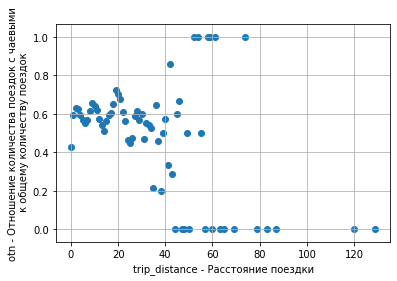

In [9]:
# Рисуем график
plt.ylabel('otn - Отношение количества поездок с чаевыми\n к общему количеству поездок')
plt.xlabel('trip_distance - Расстояние поездки')

plt.grid(True)
# plt.bar(x, y)
# plt.plot(x)
# plt.plot(y)
# plt.bar(x, y)
plt.scatter(x, y)


"""
Видим, что % поездок "с чаевыми" и "без чаевых" не выдает нам каких-то взаимосвязей.
Единственное, что можно увидеть, это падение "отношения" в интервале 5-15 км. Далее иде резкий рост показателя
"""








## Задача 2
df - данные о поездках на такси

Посмотреть активность вызовов такси по времени суток (распределение количества вызовов по времени суток - используем bar)

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


import seaborn as sns


# Получаем в df наши данные

df = pd.read_csv('netology_data.csv', sep=';')

# Для контроля
df.head(10)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,2,1,N,151,239,1,7.0,0.5,0.5,1.65,0.00,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,3,1,N,239,246,1,14.0,0.5,0.5,1.00,0.00,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.00,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.00,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.00,0.3,55.55,NaN
5,2,2018-11-28 16:25:49,2018-11-28 16:28:26,5,0,1,N,193,193,2,3.5,0.5,0.5,0.00,5.76,0.3,13.31,NaN
6,2,2018-11-28 16:29:37,2018-11-28 16:33:43,5,0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.00,0.3,55.55,NaN
7,1,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1,1,N,163,229,1,6.5,0.5,0.5,1.25,0.00,0.3,9.05,NaN
8,1,2019-01-01 00:32:01,2019-01-01 00:45:39,1,4,1,N,229,7,1,13.5,0.5,0.5,3.70,0.00,0.3,18.50,NaN
9,1,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2,1,N,141,234,1,10.0,0.5,0.5,1.70,0.00,0.3,13.00,NaN


In [11]:
# Оставляем только ЧЧ:ММ:СС в столбце "lpep_pickup_datetime"
df['pickup_time'] = df['lpep_pickup_datetime'].apply(lambda dt: datetime.strptime(dt, "%Y-%m-%d %H:%M:%S"))

# Для контроля
df['pickup_time'].head()

0   2019-01-01 00:46:40
1   2019-01-01 00:59:47
2   2018-12-21 13:48:30
3   2018-11-28 15:52:25
4   2018-11-28 15:56:57
Name: pickup_time, dtype: datetime64[ns]

In [12]:
df['pickup_time_hour'] = df['pickup_time'].apply(lambda t: t.strftime('%H:00:00'))

In [13]:
# Для контроля
df['pickup_time_hour'].head()

0    00:00:00
1    00:00:00
2    13:00:00
3    15:00:00
4    15:00:00
Name: pickup_time_hour, dtype: object

In [14]:
df = df.groupby('pickup_time_hour').count().reset_index()[['pickup_time_hour', 'VendorID']]

# Для удобства переименуем колонки
df.columns = ('pickup_time_hour', 'count_of_trips')

In [15]:
# Для контроля
df.head()

,pickup_time_hour,count_of_trips
0,00:00:00,20177
1,01:00:00,19286
2,02:00:00,15553
3,03:00:00,12248
4,04:00:00,9034


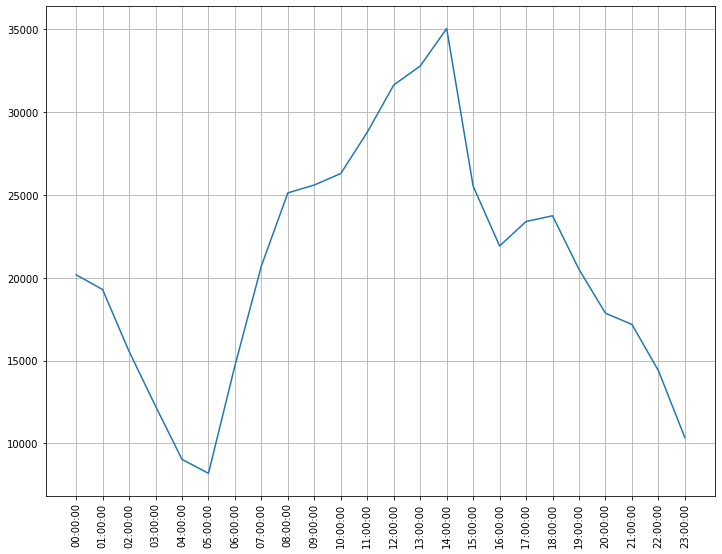

In [16]:
# Разворачиваем ярлыики подписей оси Х для лучшей читабельности
plt.xticks(rotation=90)
plt.grid(True)
# Рисуем сам bar-график
plt.plot(df['pickup_time_hour'], df['count_of_trips'])









## Задача 3
df - данные о поездках на такси

Посмотреть информацию о расстоянии поездок

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


import seaborn as sns


# Получаем в df наши данные

df = pd.read_csv('netology_data.csv', sep=';')

# Для контроля
df.head(10)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,2,1,N,151,239,1,7.0,0.5,0.5,1.65,0.00,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,3,1,N,239,246,1,14.0,0.5,0.5,1.00,0.00,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.00,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.00,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.00,0.3,55.55,NaN
5,2,2018-11-28 16:25:49,2018-11-28 16:28:26,5,0,1,N,193,193,2,3.5,0.5,0.5,0.00,5.76,0.3,13.31,NaN
6,2,2018-11-28 16:29:37,2018-11-28 16:33:43,5,0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.00,0.3,55.55,NaN
7,1,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1,1,N,163,229,1,6.5,0.5,0.5,1.25,0.00,0.3,9.05,NaN
8,1,2019-01-01 00:32:01,2019-01-01 00:45:39,1,4,1,N,229,7,1,13.5,0.5,0.5,3.70,0.00,0.3,18.50,NaN
9,1,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2,1,N,141,234,1,10.0,0.5,0.5,1.70,0.00,0.3,13.00,NaN


In [18]:
# Получаем статистику расстояний поездок
df = df.groupby('trip_distance').count().reset_index()[ ['trip_distance', 'VendorID'] ]

In [19]:
# Переименовываем столбцы
df.columns = ('trip_distance', 'counts_of_trips')
df.head()

,trip_distance,counts_of_trips
0,0,27199
1,1,192811
2,2,110028
3,3,50254
4,4,26103


<BarContainer object of 68 artists>

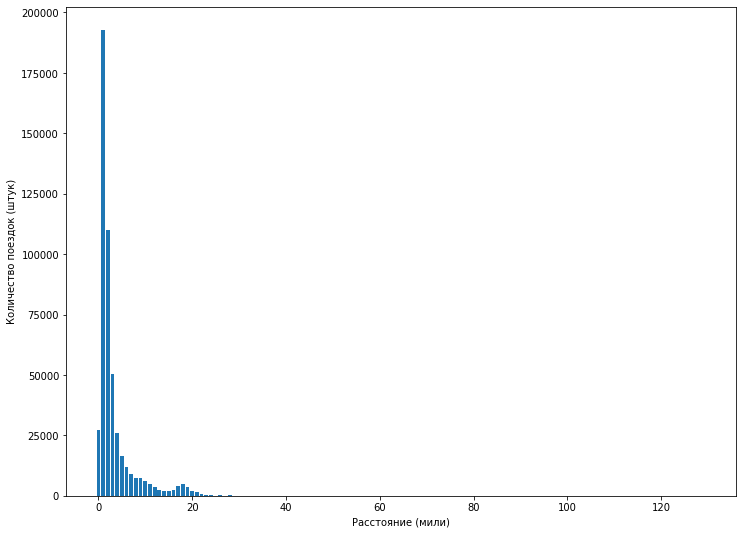

In [20]:
# Рисуем график
plt.xlabel('Расстояние (мили)')
plt.ylabel('Количество поездок (штук)')
plt.bar(df['trip_distance'], df['counts_of_trips'])



### Задача 4

Посмотреть использование способов оплаты по времени посадки

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


import seaborn as sns


# Получаем в df наши данные

df = pd.read_csv('netology_data.csv', sep=';')

# Для контроля
df.head(10)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,2,1,N,151,239,1,7.0,0.5,0.5,1.65,0.00,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,3,1,N,239,246,1,14.0,0.5,0.5,1.00,0.00,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.00,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.00,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.00,0.3,55.55,NaN
5,2,2018-11-28 16:25:49,2018-11-28 16:28:26,5,0,1,N,193,193,2,3.5,0.5,0.5,0.00,5.76,0.3,13.31,NaN
6,2,2018-11-28 16:29:37,2018-11-28 16:33:43,5,0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.00,0.3,55.55,NaN
7,1,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1,1,N,163,229,1,6.5,0.5,0.5,1.25,0.00,0.3,9.05,NaN
8,1,2019-01-01 00:32:01,2019-01-01 00:45:39,1,4,1,N,229,7,1,13.5,0.5,0.5,3.70,0.00,0.3,18.50,NaN
9,1,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2,1,N,141,234,1,10.0,0.5,0.5,1.70,0.00,0.3,13.00,NaN


In [22]:

# Оставляем только ЧЧ:ММ:СС в столбце "lpep_pickup_datetime"
df['pickup_time'] = df['lpep_pickup_datetime'].apply(lambda dt: datetime.strptime(dt, "%Y-%m-%d %H:%M:%S"))

# Для контроля
df['pickup_time'].head()

0   2019-01-01 00:46:40
1   2019-01-01 00:59:47
2   2018-12-21 13:48:30
3   2018-11-28 15:52:25
4   2018-11-28 15:56:57
Name: pickup_time, dtype: datetime64[ns]

In [23]:
df['pickup_time_hour'] = df['pickup_time'].apply(lambda t: t.strftime('%H:00:00'))

# Для контроля
df['pickup_time_hour'].head()

0    00:00:00
1    00:00:00
2    13:00:00
3    15:00:00
4    15:00:00
Name: pickup_time_hour, dtype: object

In [24]:
# df = df.groupby('pickup_time_hour').count().reset_index()
df.head()

# # Для удобства переименуем колонки
# df.columns = ('pickup_time_hour', 'count_of_trips')

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_time,pickup_time_hour
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,2,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,2019-01-01 00:46:40,00:00:00
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,3,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,2019-01-01 00:59:47,00:00:00
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,2018-12-21 13:48:30,13:00:00
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN,2018-11-28 15:52:25,15:00:00
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN,2018-11-28 15:56:57,15:00:00


In [25]:
pvt = df.pivot_table(
                        index='pickup_time_hour', 
                        columns='payment_type', 
                        values='trip_distance', 
                        aggfunc=len).fillna(0).applymap(float)
pvt

payment_type,1,2,3,4
pickup_time_hour,,,,
00:00:00,12493.0,7512.0,122.0,50.0
01:00:00,12387.0,6746.0,103.0,50.0
02:00:00,10084.0,5292.0,127.0,50.0
03:00:00,7692.0,4426.0,97.0,33.0
04:00:00,5144.0,3758.0,99.0,33.0
05:00:00,4717.0,3344.0,104.0,27.0
06:00:00,9433.0,5124.0,86.0,47.0
07:00:00,14389.0,6196.0,97.0,32.0
08:00:00,17997.0,6994.0,97.0,33.0


'\n1=Credit card\n2=Cash\n3=No charge\n4=Dispute\n'

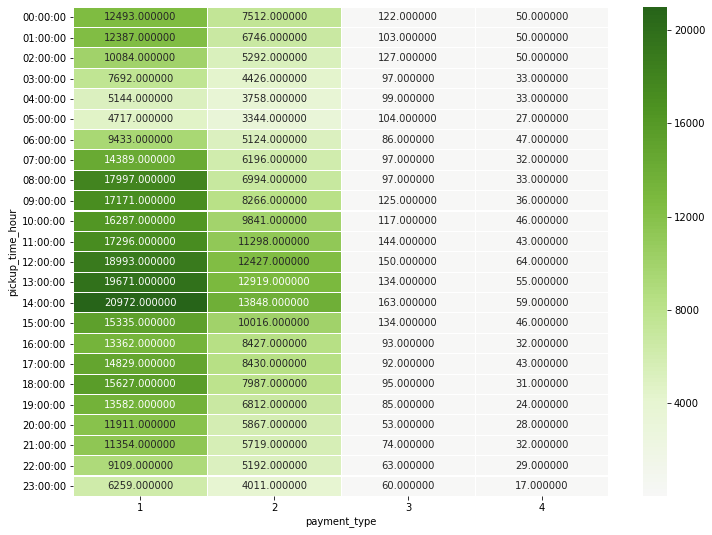

In [26]:
sns.heatmap(pvt, linewidths=.1, annot=True, fmt="f", center=0 , cmap="PiYG")

"""
1=Credit card
2=Cash
3=No charge
4=Dispute
"""

# Здесь хорошо видно время суток и способ платежа

### Задача 5

Посмотреть разброс суммы чаевых

In [27]:
from pylab import rcParams
rcParams['figure.figsize'] = 22,11

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


import seaborn as sns


# Получаем в df наши данные

df = pd.read_csv('netology_data.csv', sep=';')

# Так как в  df есть отрицательные чаевые, то мы их убираем как выбросы (а может просто кого-то очень плохо везли :) )
df = df.loc[df['tip_amount']>0]

# Для контроля
df.head(10)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,2,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,3,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
7,1,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1,1,N,163,229,1,6.5,0.5,0.5,1.25,0.0,0.3,9.05,NaN
8,1,2019-01-01 00:32:01,2019-01-01 00:45:39,1,4,1,N,229,7,1,13.5,0.5,0.5,3.70,0.0,0.3,18.50,NaN
9,1,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2,1,N,141,234,1,10.0,0.5,0.5,1.70,0.0,0.3,13.00,NaN
10,1,2019-01-01 00:24:04,2019-01-01 00:47:06,2,3,1,N,246,162,1,15.0,0.5,0.5,3.25,0.0,0.3,19.55,NaN
11,1,2019-01-01 00:21:59,2019-01-01 00:28:24,1,1,1,N,238,151,1,5.5,0.5,0.5,1.70,0.0,0.3,8.50,NaN
12,1,2019-01-01 00:45:21,2019-01-01 01:31:05,1,9,1,N,163,25,1,34.5,0.5,0.5,7.15,0.0,0.3,42.95,NaN
13,1,2019-01-01 00:43:19,2019-01-01 01:07:42,1,6,1,N,224,25,1,21.5,0.5,0.5,5.70,0.0,0.3,28.50,NaN
14,1,2019-01-01 00:58:24,2019-01-01 01:15:18,1,3,1,N,141,234,1,13.0,0.5,0.5,1.00,0.0,0.3,15.30,NaN


In [28]:
# Группируем по сумме чаевых
df = df.groupby('tip_amount').count().reset_index()[['tip_amount', 'VendorID']]

In [29]:
df.head()

,tip_amount,VendorID
0,0.01,295
1,0.02,103
2,0.03,24
3,0.04,16
4,0.05,55


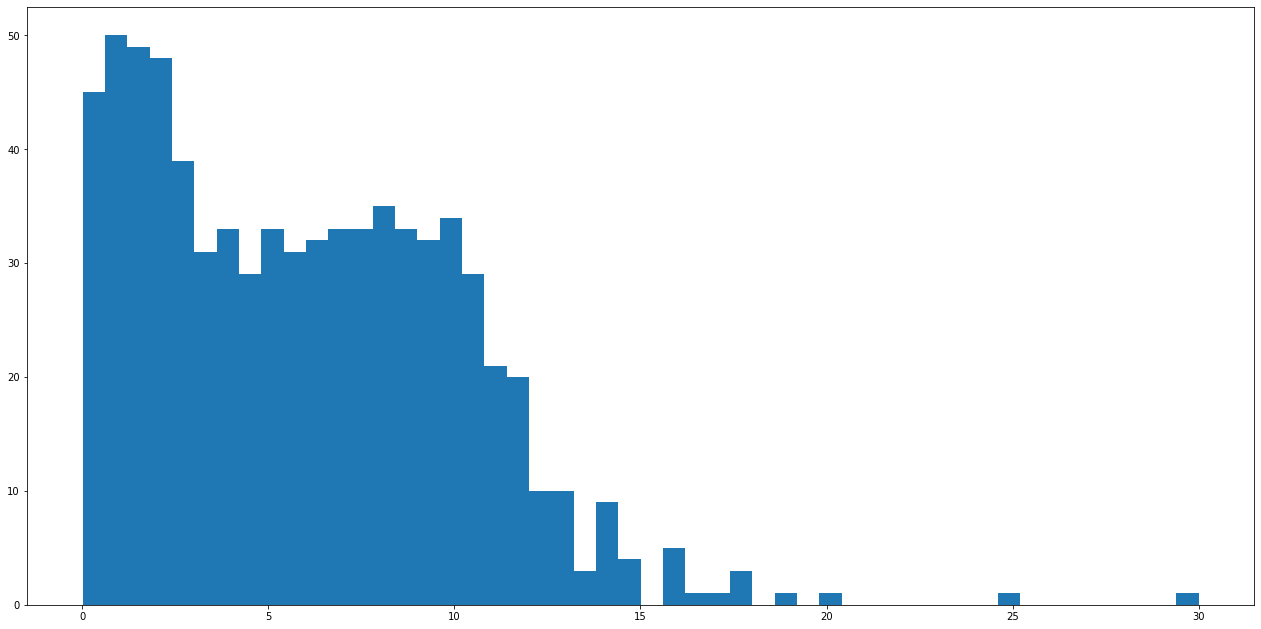

In [30]:
# переименовываем столбцы
df.columns = ['tip_amount', 'count']

# Убираем выбросы
df = df.loc[ df['count'] > 10]

# Рисуем 
ax = plt.hist(df['tip_amount'],  bins=50)

# Здесь мы видим распределение